In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

## Main Plotting Logic

In [4]:
policy_to_i_map = {
    'Random': 0,
    'CoupColl': 1,
    'RatioColl': 2,
    'EpsilonGreedy': 4,
    'UCB': 3
}

In [7]:
def plot(df, known):
    # First, determine if the X variable is n or m
    if len(set(df['n'])) == 1:
        X = list(set(df['m']))
        X.sort()
        xlabel_str = '# Groups'
        xdf_str = 'm'
    else:
        X = list(set(df['n']))
        X.sort()
        xlabel_str = '# Sources'
        xdf_str = 'n'
    if known:
        policies = ['Random', 'CoupColl', 'RatioColl']
        known_str = 'known'
    else:
        policies = ['Random', 'UCB', 'EpsilonGreedy']
        known_str = 'unknown'
    # Iterate over combinations of majority or minority distribution & cost model
    for majority in [True, False]:
        for cost_model in ['uniform', 'random', 'skewed']:
            # Filtered_df now has all data for a single plot
            filtered_df = df[(df['majority_distribution'] == majority) & (df['cost_model'] == cost_model)]
            # Organize the Y values
            cost_Y = { 
                policy : list(filtered_df[filtered_df['policy'] == policy]['avg_cost'])
                for policy in policies 
            }
            #print(cost_Y)
            count_Y = {
                policy : list(filtered_df[filtered_df['policy'] == policy]['avg_iters'])
                for policy in policies
            }

            # Plotting logic
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax2.set_ylim(bottom=0, top=max(max(count_Y[policy]) for policy in policies) * 1.1)
            cmap = cm.Set2
            
            # Compute the position of each bar
            bar_width = 0.3
            X1 = np.arange(len(X))
            for i in range(len(policies)):
                policy = policies[i]
                ax1.bar([x + bar_width * i for x in X1], cost_Y[policy], label=policy, width=bar_width, color=cmap(policy_to_i_map[policy]), alpha=0.75)
                ax2.plot([x + bar_width * (len(policies) - 1) / 2 for x in X1], count_Y[policy], label=policy, color=cmap(policy_to_i_map[policy]))
            ax1.set_ylabel('Cost')
            ax2.set_ylabel('Iters')
            ax1.set_xlabel(xlabel_str)
            ax1.set_xticks(X1 + bar_width * (len(policies) - 1) / 2)
            ax1.legend(loc="best")
            #ax2.legend(loc="best")
            ax1.set_xticklabels(X)
            if majority:
                majority_str = 'Majority'
            else:
                majority_str = 'Minority'
            plt.title(majority_str + ', ' + cost_model + ' costs')
            #plt.show()
            plt.savefig(known_str + '_' + xdf_str + '_' + majority_str.lower() + '_' + cost_model + '.png', dpi=300)

# Fixed n, changing m

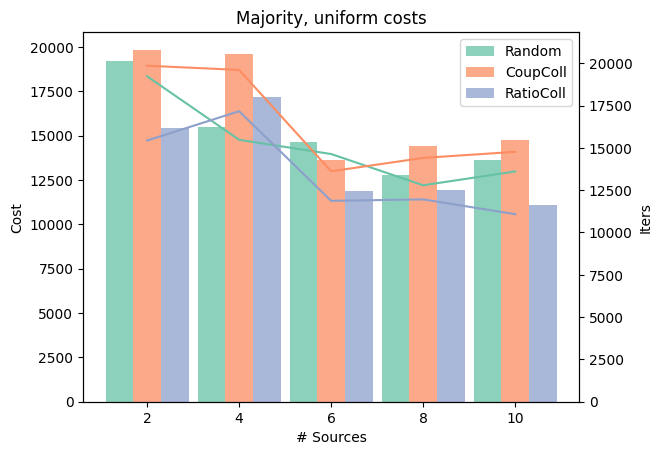

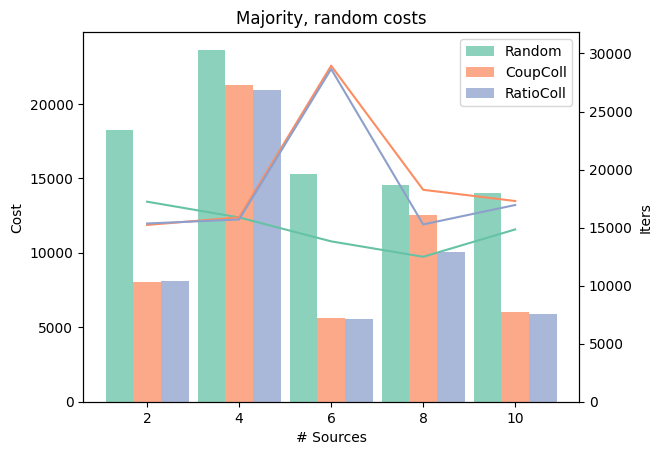

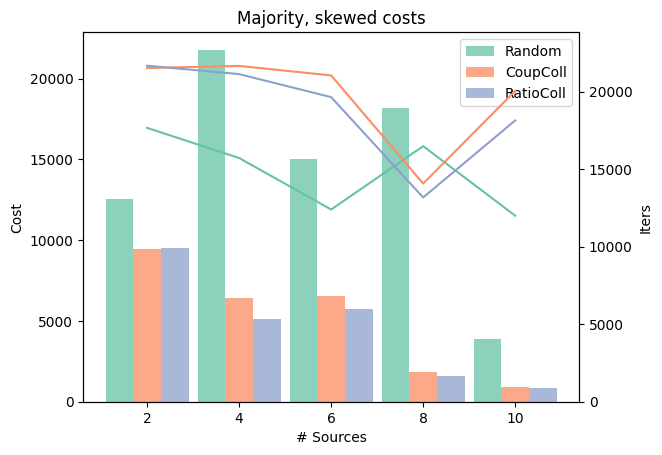

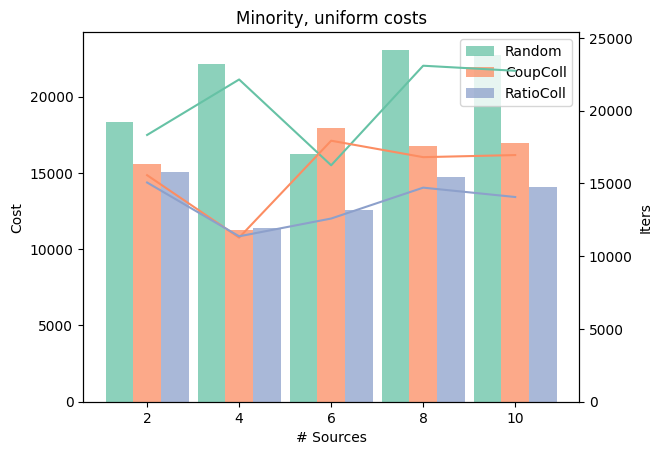

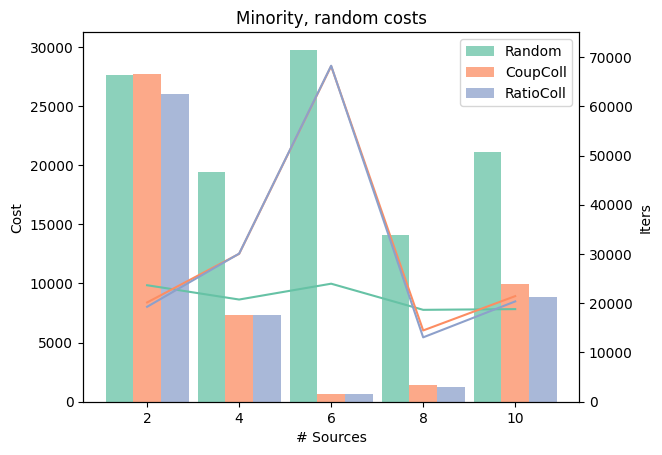

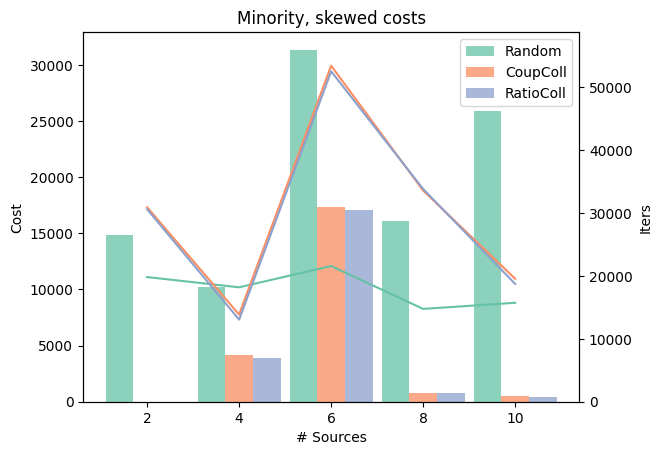

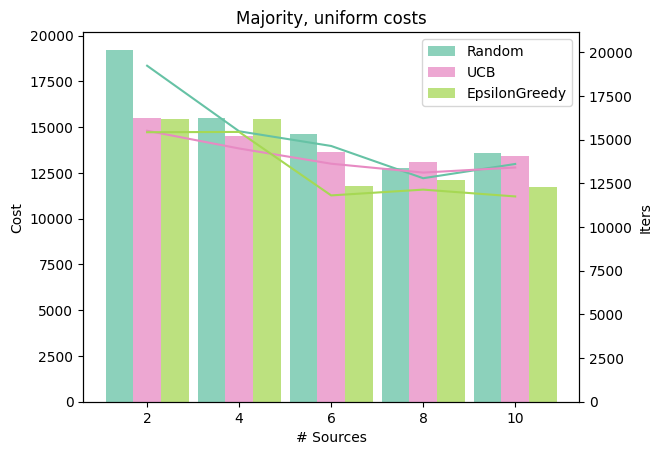

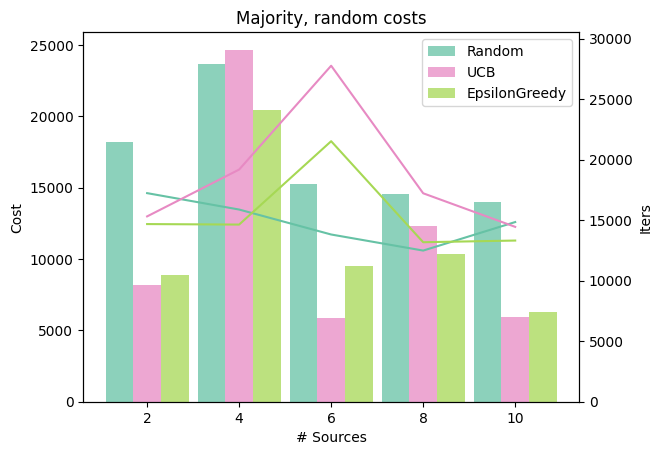

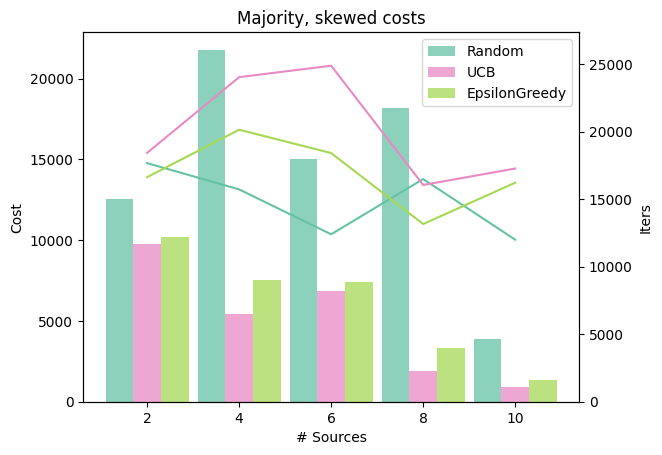

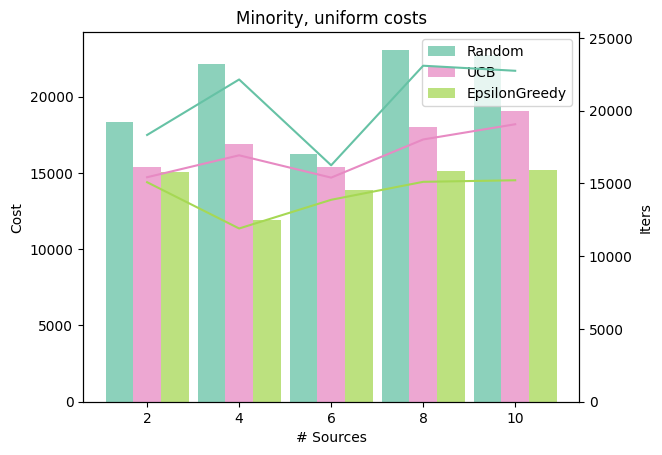

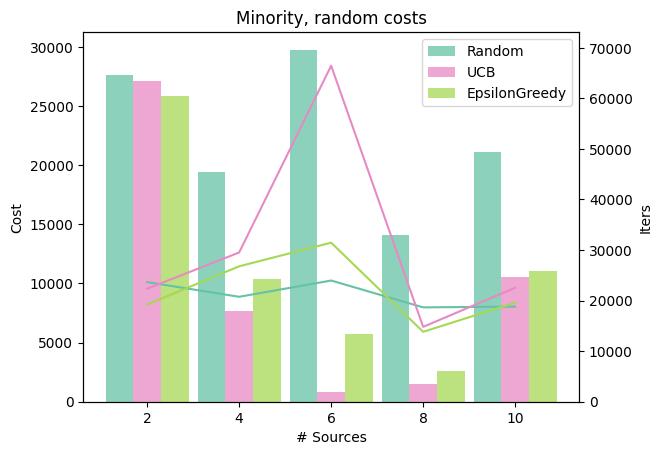

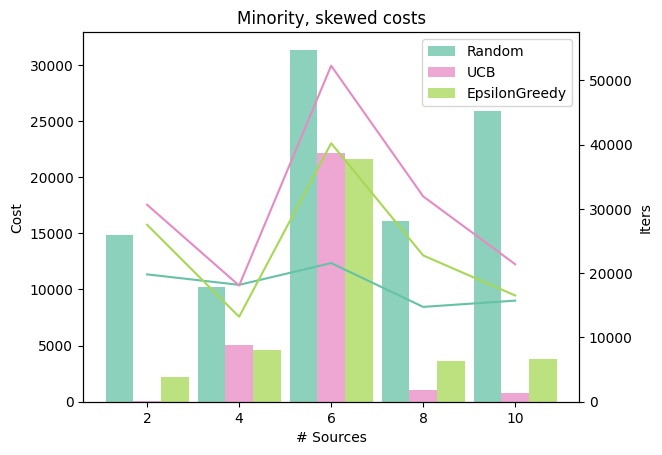

In [9]:
df = pd.read_csv('../results/wall5.csv', comment='#')
plot(df, True),
plot(df, False)

## Fixed m, changing n

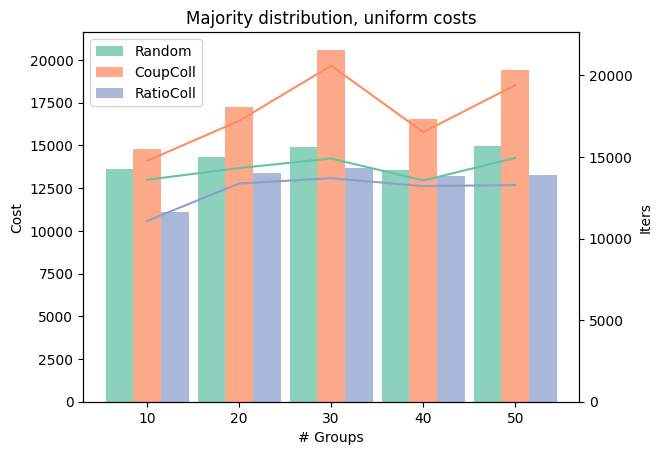

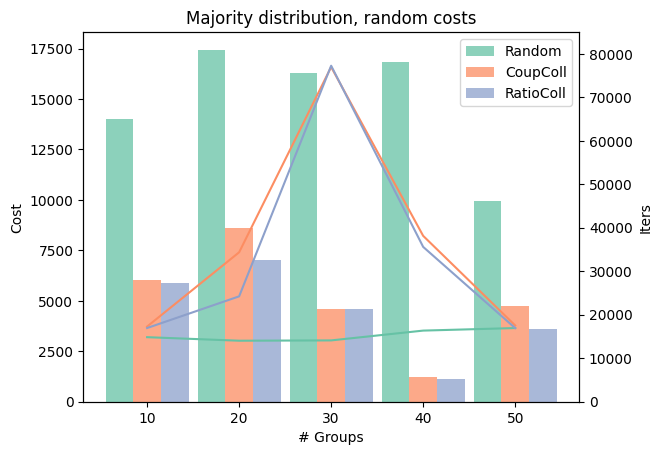

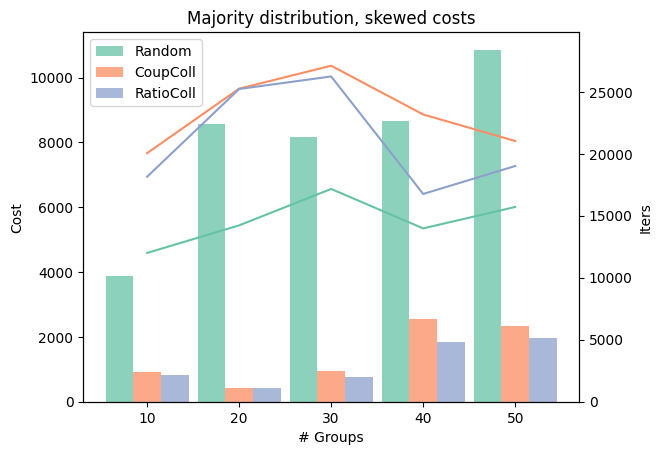

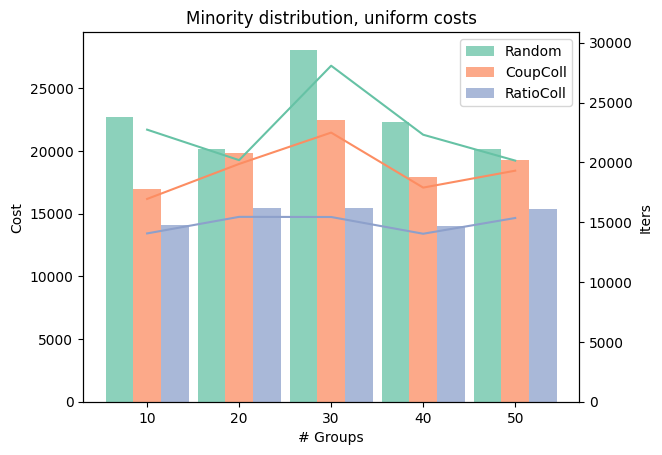

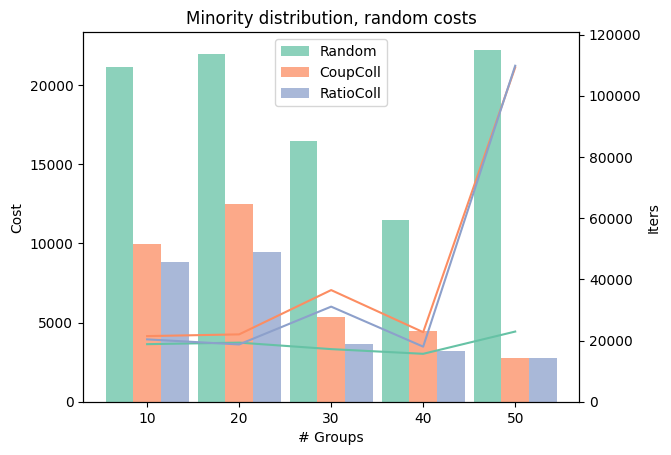

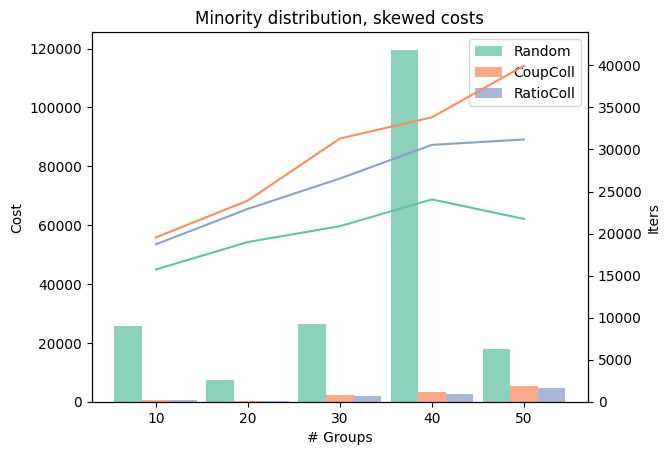

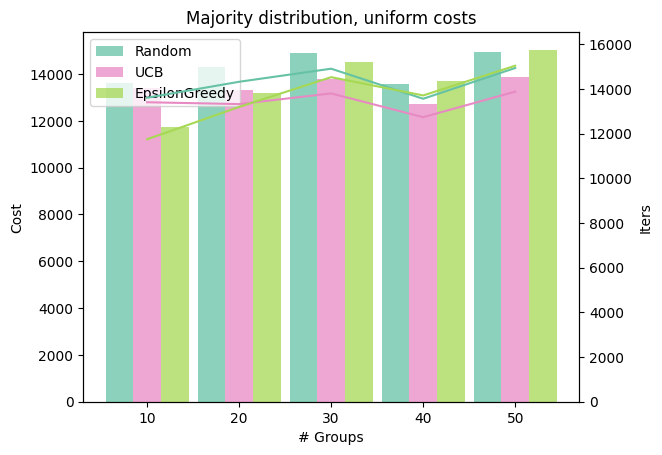

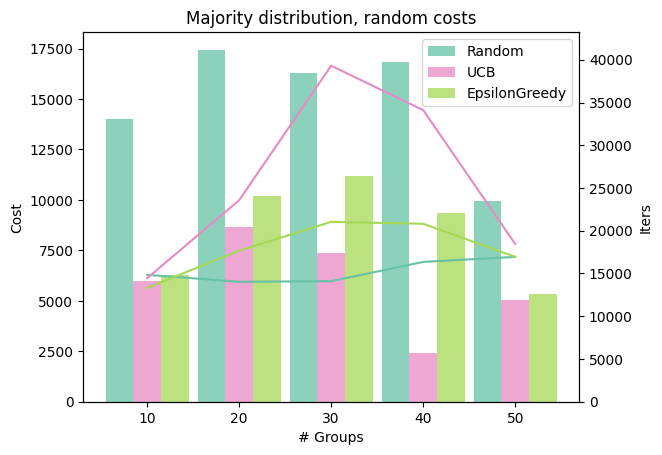

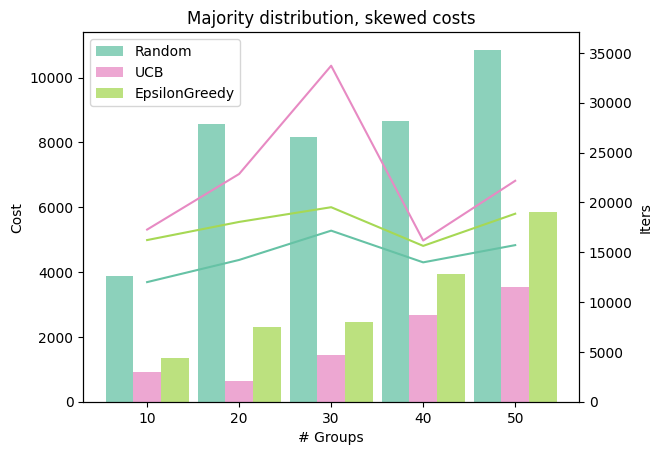

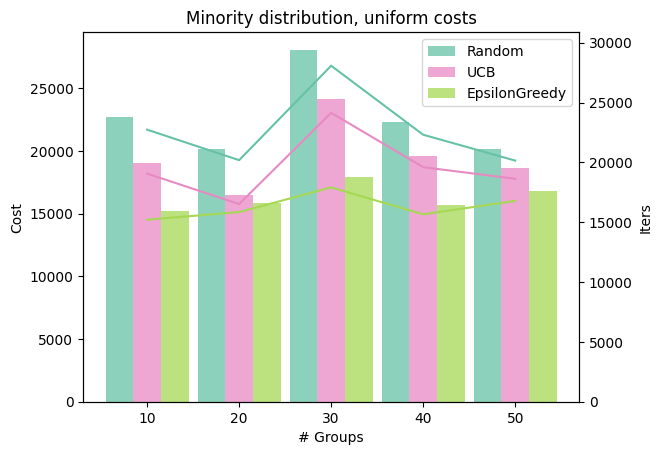

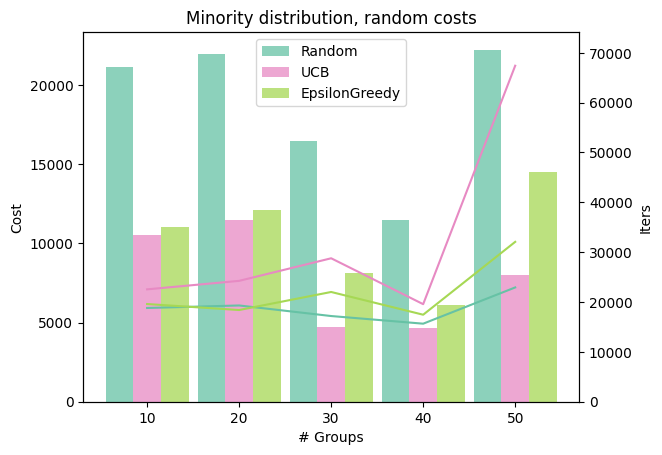

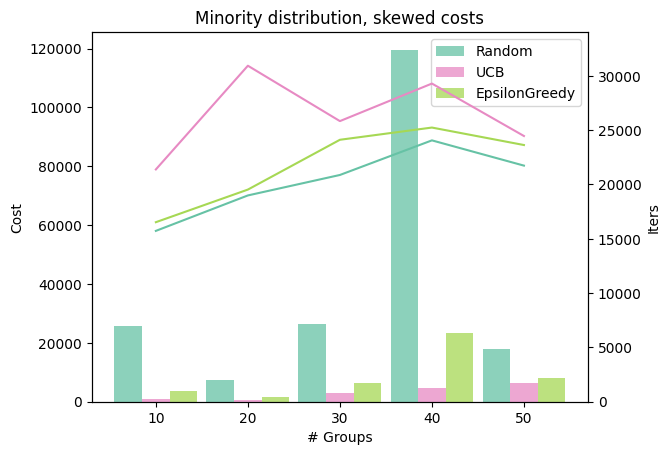

In [32]:
df = pd.read_csv('../results/wall6.csv', comment='#')
plot(df, True)
plot(df, False)